In [12]:
import sys
sys.path.append("../src/")

import uncertainpy

# Stock example

In [13]:
import uncertainpy.argumentation as arg

# Define your model
model = arg.systems.QuadraticEnergyModel()
# Set an approximator
model.approximator = arg.approximators.RK4(model)
# Set the BAG
model.BAG = arg.BAG("./BAG/stock_example.bag")

model.solve(delta=10e-2, epsilon=10e-4, verbose=True, generate_plot=False)

QuadraticEnergyModel, RK4
Time: 8.399999999999986
Argument(name=Buy, weight=0.5, strength=0.8208178793031596)
Argument(name=Sell, weight=0.5, strength=0.36345378093100583)
Argument(name=1, weight=0.8, strength=0.20494963930535626)
Argument(name=2, weight=0.7, strength=0.8050136080030856)
Argument(name=3, weight=0.3, strength=0.165776045953347)
Argument(name=4, weight=0.9, strength=0.9)
Argument(name=5, weight=0.9, strength=0.9)



0.0009849389836143567

# Stock example (with graph)

<module 'matplotlib.pyplot' from 'C:\\Users\\tinos\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

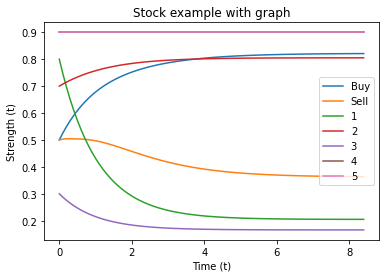

In [14]:
import uncertainpy.argumentation as arg
from uncertainpy.argumentation.graphing import graph

model = arg.systems.QuadraticEnergyModel()
model.approximator = arg.approximators.RK4(model)
model.BAG = arg.BAG("./BAG/stock_example.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
graph(model, DELTA, EPSILON, "Stock example with graph")

# Stock example comparison

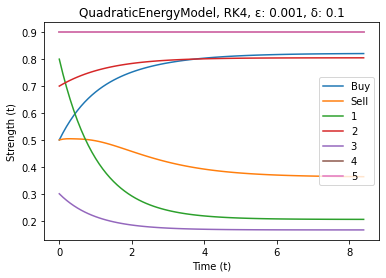

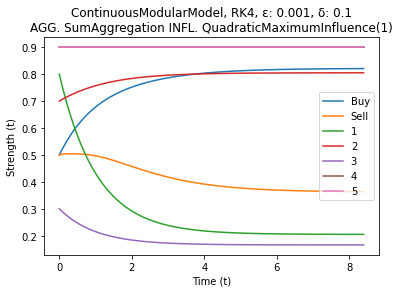

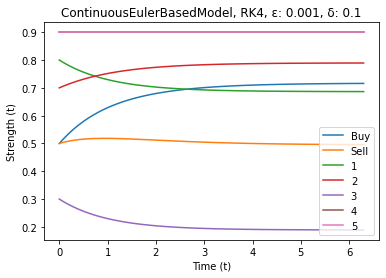

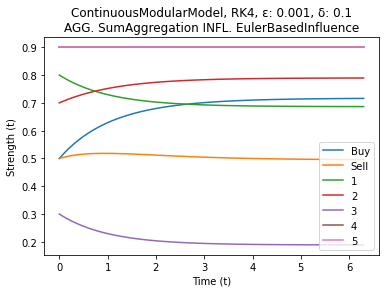

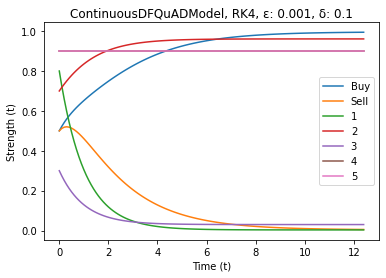

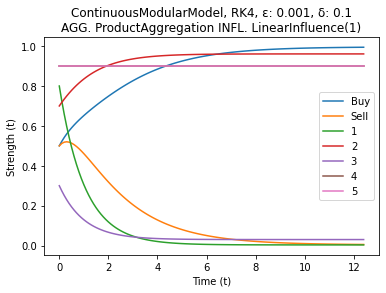

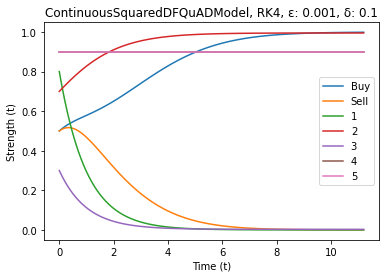

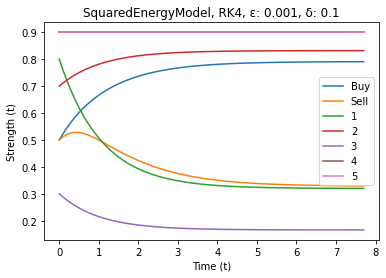

In [15]:
import uncertainpy.argumentation as arg
from uncertainpy.argumentation.graphing import graph

DELTA = 10e-2
EPSILON = 10e-4

models = []
plots = []

models.append(arg.systems.QuadraticEnergyModel())
models.append(arg.systems.ContinuousModularModel(arg.aggregation.SumAggregation(), arg.influence.QuadraticMaximumInfluence(conservativeness=1)))
models.append(arg.systems.ContinuousEulerBasedModel())
models.append(arg.systems.ContinuousModularModel(arg.aggregation.SumAggregation(), arg.influence.EulerBasedInfluence()))
models.append(arg.systems.ContinuousDFQuADModel())
models.append(arg.systems.ContinuousModularModel(arg.aggregation.ProductAggregation(), arg.influence.LinearInfluence(conservativeness=1)))
models.append(arg.systems.ContinuousSquaredDFQuADModel())
models.append(arg.systems.SquaredEnergyModel())

for model in models:
    BAG = arg.BAG("./BAG/stock_example.bag")
    BAG.reset_strength_values()
    model.approximator = arg.approximators.RK4(model)
    model.BAG = BAG

    result = model.solve(delta=DELTA, epsilon=EPSILON, verbose=False, generate_plot=True)
    title = f"{model.name}, {model.approximator}, ε: {EPSILON}, δ: {DELTA}"
    if model.aggregation is not None:
        title += f"\nAGG. {model.aggregation}"
    if model.influence is not None:
        title += f" INFL. {model.influence}"

    plots.append(graph(model, DELTA, EPSILON, title))

for plot in plots:
    plot.show()
